## ANÁLISIS DE INFORMACIÓN DE CALIDAD DE AIRE DEL SENAMHI
##### CURSO: ANÁLISIS DE DATOSAMBIENTALES CON PYTHON I

##### AUTOR: https://github.com/marvinjonathcn 

- #### NOTA: El siguiente código fue desarrollado en python 3.8.5. Antes de ejecutar los scripts se deben instalar las librerías necesarias. 

### 1. INSTALACIÓN E IMPORTACIÓN DE LAS LIBRERÍAS

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import missingno as msno

import requests
import re

### 2. IMPORTACIÓN DE LAS BASES DE DATOS

In [4]:
# HACER UNA SOLICITUD PARA OBTENER LA INFORMACIÓN DE UNA PAGINA WEB EN HTTP

r = requests.get("https://www.senamhi.gob.pe/site/sea/www/site/sea/graficas/dato_hora.php?estacion=112194&cont=N_PM25&f1=24/03/2014&f2=03/04/2021")
print(r.text)


<!DOCTYPE HTML>
<html>
	<head>
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<title>SENAMHI - SEA</title>

		<style type="text/css">

		</style>
	</head>
	<body>
<script src="code/highcharts.js"></script>
<script src="code/modules/exporting.js"></script>

<div id="container" style="min-width: 310px; height: 580px; margin: 0 auto"></div>

<script type="text/javascript">

    Highcharts.chart('container', {
        chart: {
            type: 'line'
        },
        title: {
            text: 'ESTACI\u00D3N: CAMPO DE MARTE (CDM) - Lima Centro'
        },
        subtitle: {
            text: ''
        },
        xAxis: {
            categories: ['04/04/201414:00:','04/04/201415:00:','04/04/201416:00:','04/04/201417:00:','04/04/201418:00:','04/04/201419:00:','04/04/201420:00:','04/04/201421:00:','04/04/201422:00:','04/04/201423:00:','05/04/201400:00:','05/04/201401:00:','05/04/201402:00:','05/04/201403:00:','05/04/201404:00:','05/04/201405:00:','05/04/201406:0

In [5]:
# REALIZAR CORTES AL TEXTO DEPENDIENDO LA UBICACION DE CIERTAS PALABRAS O FRASES

s = r.text

s_split1 = s.split('radius: 0,')[2]

s_split2 = s_split1.split('[')[1]

s_split3 = s_split2.split(',]')[0] 

s_split3


'null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

In [6]:
# REALIZAR CORTES AL TEXTO DEPENDIENDO LA UBICACION DE CIERTAS PALABRAS O FRASES

s2 = r.text

s2_split1 = s2.split('xAxis: {')[1]

s2_split2 = s2_split1.split('[')[1]

s2_split3 = s2_split2.split(',]')[0] 

s2_split3


"'04/04/201414:00:','04/04/201415:00:','04/04/201416:00:','04/04/201417:00:','04/04/201418:00:','04/04/201419:00:','04/04/201420:00:','04/04/201421:00:','04/04/201422:00:','04/04/201423:00:','05/04/201400:00:','05/04/201401:00:','05/04/201402:00:','05/04/201403:00:','05/04/201404:00:','05/04/201405:00:','05/04/201406:00:','05/04/201407:00:','05/04/201408:00:','05/04/201409:00:','05/04/201410:00:','05/04/201411:00:','05/04/201412:00:','05/04/201413:00:','05/04/201414:00:','05/04/201415:00:','05/04/201416:00:','05/04/201417:00:','05/04/201418:00:','05/04/201419:00:','05/04/201420:00:','05/04/201421:00:','05/04/201422:00:','05/04/201423:00:','06/04/201400:00:','06/04/201401:00:','06/04/201402:00:','06/04/201403:00:','06/04/201404:00:','06/04/201405:00:','06/04/201406:00:','06/04/201407:00:','06/04/201408:00:','06/04/201409:00:','06/04/201410:00:','06/04/201411:00:','06/04/201412:00:','06/04/201413:00:','06/04/201414:00:','06/04/201415:00:','06/04/201416:00:','06/04/201417:00:','06/04/2014

### 3. CONVERSIÓN DE FORMATOS Y MANIPULACIÓN DEL DATAFRAME

In [8]:
# REALIZAR LA SEPARACIÓN DE LOS ARCHIVOS JSON POR UNA COMA PM 2.5

values = [str(i) for i in s_split3.split(',')]

df1 = pd.DataFrame(values, columns=['PM2.5'])

df1

,PM2.5
0,null
1,null
2,null
3,null
4,null
...,...
47920,12.1
47921,13.8
47922,14.3
47923,15.7


In [9]:
# REALIZAR LA SEPARACIÓN DE LOS ARCHIVOS JSON POR UNA COMA FECHAS

values2 = [str(i) for i in s2_split3.split(',')]
values2 = [i[1:-2] for i in values2]

df2 = pd.DataFrame(values2, columns=['Date'])
df2

,Date
0,04/04/201414:00
1,04/04/201415:00
2,04/04/201416:00
3,04/04/201417:00
4,04/04/201418:00
...,...
47920,03/04/202119:00
47921,03/04/202120:00
47922,03/04/202121:00
47923,03/04/202122:00


In [10]:
# REEMPLAZAR LOS VALORES NULL POR NP.NAN PARA QUE SEA RECONOCIDO COMO MISSING

df = pd.concat([df1, df2], axis=1)

df

,PM2.5,Date
0,null,04/04/201414:00
1,null,04/04/201415:00
2,null,04/04/201416:00
3,null,04/04/201417:00
4,null,04/04/201418:00
...,...,...
47920,12.1,03/04/202119:00
47921,13.8,03/04/202120:00
47922,14.3,03/04/202121:00
47923,15.7,03/04/202122:00


In [11]:
df.dtypes

PM2.5    object
Date     object
dtype: object

In [12]:
# CAMBIAR EL FORMATO DE CONCETRACION DE PM2.5 A 

df = df.replace('null', np.nan, regex=True)

df['PM2.5'] = df['PM2.5'].astype(float)

df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%d/%m/%Y%H:%M')


In [13]:
df.dtypes

PM2.5           float64
Date     datetime64[ns]
dtype: object

### 4. ANÁLISIS DE LOS DATOS

In [14]:
df.profile_report()

<AxesSubplot:>

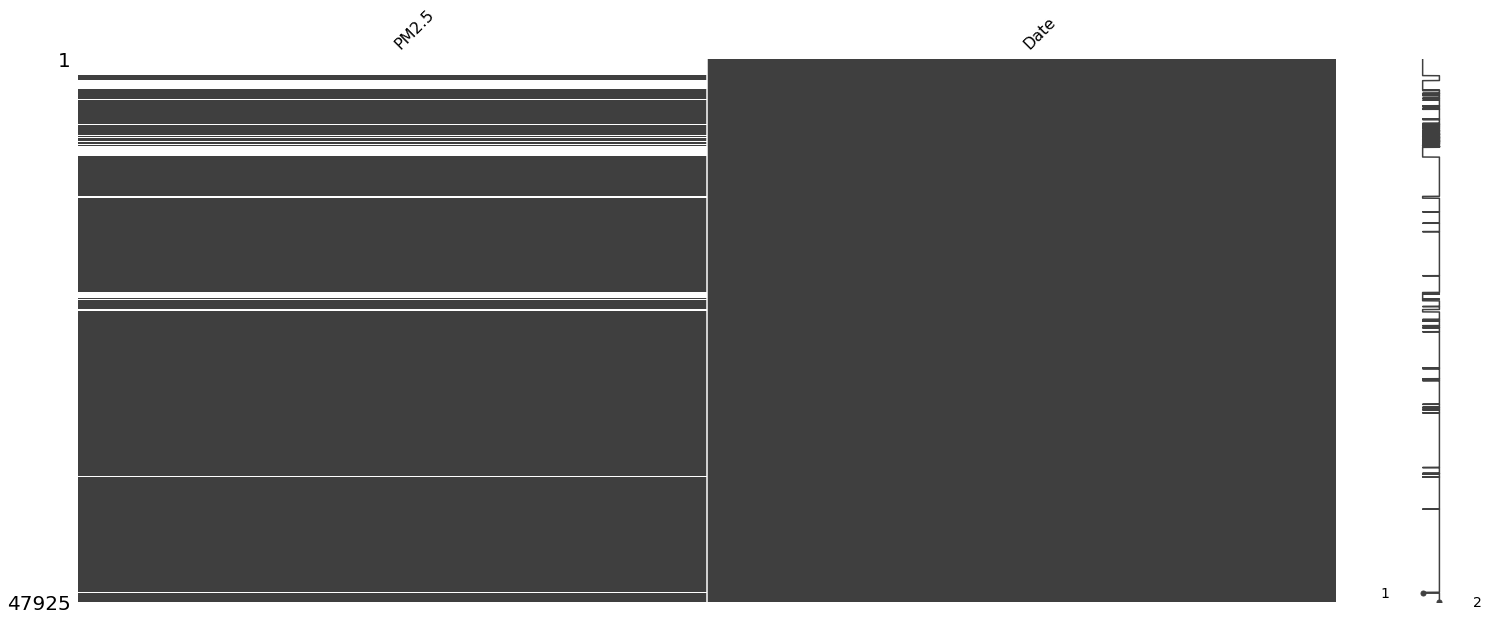

In [15]:
# NUMERO DE MISSING POR COLUMNA

msno.matrix(df) 

In [16]:
# NUMERO DE MISSING POR COLUMNA

df.isnull().sum()

PM2.5    4702
Date        0
dtype: int64

<AxesSubplot:xlabel='Date'>

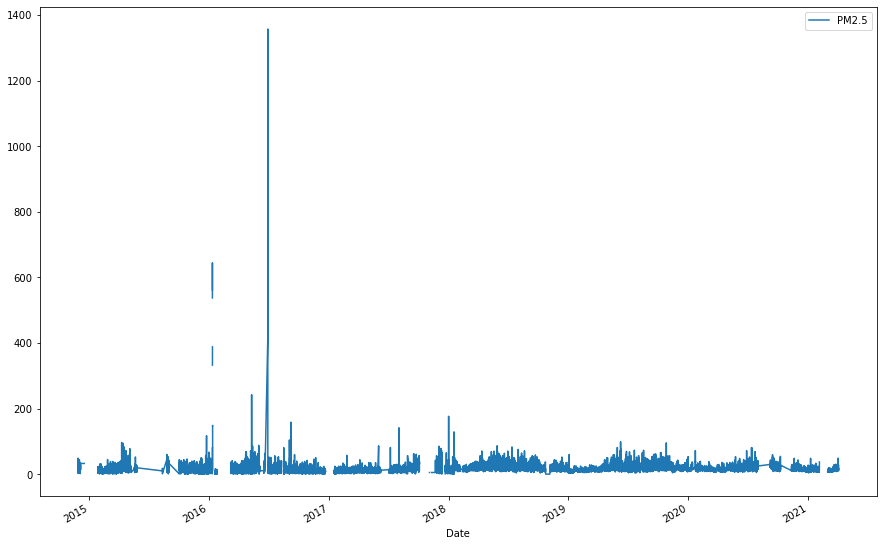

In [17]:
# GRAFICO SIMPLE 

df = df.set_index('Date')

df.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

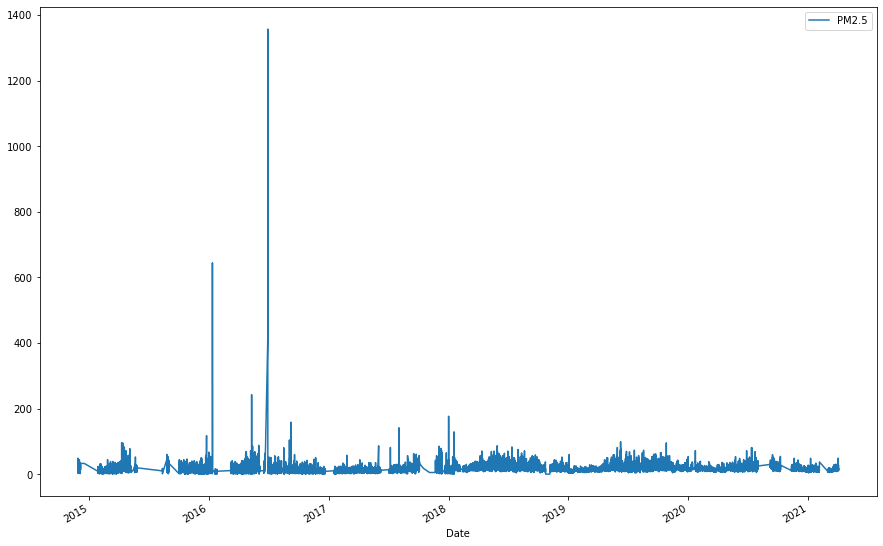

In [19]:
# ELIMINAR LOS NA

df_sin_na = df.dropna(subset = ["PM2.5"])

df_sin_na.plot(figsize=(15,10))

<AxesSubplot:>

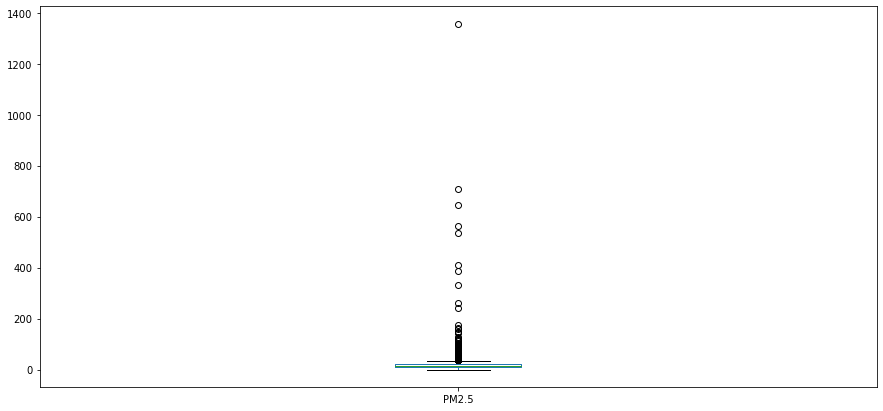

In [20]:
# BOXPLOT PARA NUESTROS DATOS

df.plot.box(figsize=(15,7))

In [26]:
# ELIMINAR VALORES ATIPICOS USANDO EL BOX PLOT

Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1    #IQR es el rango intercuartil 

filter_sin_outlier = (df['PM2.5'] >= Q1 - 1.5 * IQR) & (df['PM2.5'] <= Q3 + 1.5 *IQR)
df_sin_outlier = df.loc[filter_sin_outlier]

df_sin_outlier.head(15)

,PM2.5
Date,
2014-11-27 11:00:00,8.9
2014-11-27 13:00:00,11.4
2014-11-27 14:00:00,7.8
2014-11-27 15:00:00,6.5
2014-11-27 16:00:00,10.1
2014-11-27 17:00:00,12.4
2014-11-27 18:00:00,19.8
2014-11-27 19:00:00,21.6
2014-11-27 20:00:00,21.3


In [23]:
# NUMERO DE MISSING POR COLUMNA

df_sin_outlier.isnull().sum()

PM2.5    0
dtype: int64

<AxesSubplot:xlabel='Date'>

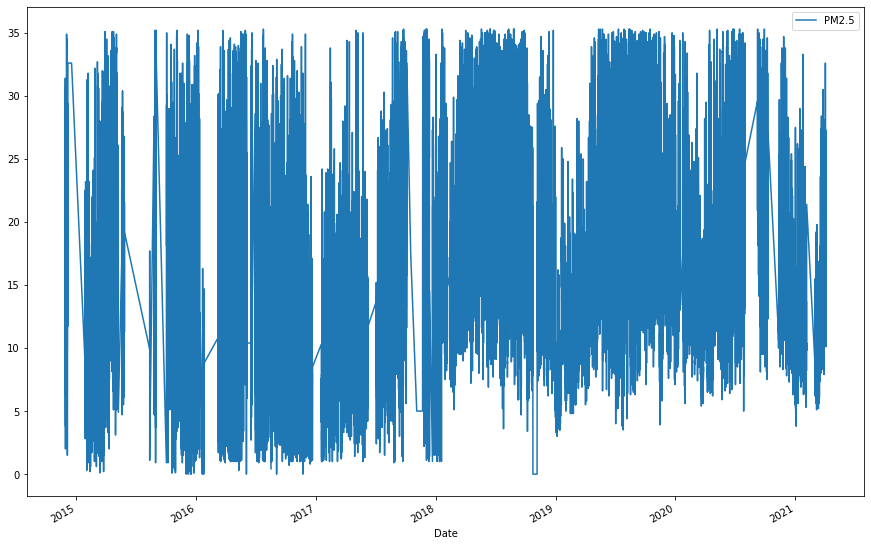

In [24]:
df_sin_outlier.plot(figsize=(15,10))